In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt #plotting
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('201507-citibike-tripdata.csv')

In [3]:
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,732,7/1/2015 00:00:03,7/1/2015 00:12:16,489,10 Ave & W 28 St,40.750664,-74.001768,368,Carmine St & 6 Ave,40.730386,-74.002150,18669,Subscriber,1970,1
1,322,7/1/2015 00:00:06,7/1/2015 00:05:29,304,Broadway & Battery Pl,40.704633,-74.013617,3002,South End Ave & Liberty St,40.711512,-74.015756,14618,Subscriber,1984,1
2,790,7/1/2015 00:00:17,7/1/2015 00:13:28,447,8 Ave & W 52 St,40.763707,-73.985162,358,Christopher St & Greenwich St,40.732916,-74.007114,18801,Subscriber,1992,1
3,1228,7/1/2015 00:00:23,7/1/2015 00:20:51,490,8 Ave & W 33 St,40.751551,-73.993934,250,Lafayette St & Jersey St,40.724561,-73.995653,19137,Subscriber,1990,1
4,1383,7/1/2015 00:00:44,7/1/2015 00:23:48,327,Vesey Pl & River Terrace,40.715338,-74.016584,72,W 52 St & 11 Ave,40.767272,-73.993929,15808,Subscriber,1988,1


In [4]:
data1 = data[data.usertype=='Customer']
data2 = data[data.usertype=='Subscriber']

In [5]:
data1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
8,1771,7/1/2015 00:01:25,7/1/2015 00:30:57,405,Washington St & Gansevoort St,40.739323,-74.008119,405,Washington St & Gansevoort St,40.739323,-74.008119,20171,Customer,NaN,0
10,1735,7/1/2015 00:01:50,7/1/2015 00:30:45,405,Washington St & Gansevoort St,40.739323,-74.008119,405,Washington St & Gansevoort St,40.739323,-74.008119,17543,Customer,NaN,0
17,951,7/1/2015 00:02:43,7/1/2015 00:18:35,212,W 16 St & The High Line,40.743349,-74.006818,498,Broadway & W 32 St,40.748549,-73.988084,16767,Customer,NaN,0
18,1352,7/1/2015 00:02:47,7/1/2015 00:25:20,328,Watts St & Greenwich St,40.724055,-74.009660,167,E 39 St & 3 Ave,40.748901,-73.976049,17003,Customer,NaN,0
21,383,7/1/2015 00:03:16,7/1/2015 00:09:39,2021,W 45 St & 8 Ave,40.759291,-73.988597,479,9 Ave & W 45 St,40.760193,-73.991255,14895,Customer,NaN,0


In [6]:
data1[ u'start station name'].value_counts()
#data2[ u'start station name'].value_counts()

Central Park S & 6 Ave               5516
Centre St & Chambers St              4047
Grand Army Plaza & Central Park S    3889
West St & Chambers St                3453
12 Ave & W 40 St                     3195
Broadway & W 60 St                   3139
South End Ave & Liberty St           2325
Vesey Pl & River Terrace             2121
Broadway & W 58 St                   1905
Washington St & Gansevoort St        1771
Old Fulton St                        1747
W 20 St & 11 Ave                     1731
W 14 St & The High Line              1526
9 Ave & W 14 St                      1491
Broadway & W 24 St                   1480
Cleveland Pl & Spring St             1402
Little West St & 1 Pl                1383
E 17 St & Broadway                   1301
Carmine St & 6 Ave                   1268
Christopher St & Greenwich St        1212
Bus Slip & State St                  1198
S 5 Pl & S 4 St                      1193
Peck Slip & Front St                 1167
Broadway & W 49 St                

## groupby start and end station

In [7]:
grouped = data1.groupby([u'start station id', u'end station id']).size()
grouped.to_csv('1.csv')
grouped = pd.read_csv('1.csv',header=None)

In [8]:
grouped.columns=['start station id','end station id','counts']

In [9]:
grouped.head()

,start station id,end station id,counts
0,72,72,40
1,72,128,4
2,72,147,3
3,72,150,1
4,72,153,3


## delete edge which have the same station as their start and end.

In [10]:
grouped = grouped.drop('start station id'=='end station id')

In [11]:
data1.keys()

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

## merge with name,lati,longi

In [12]:
data_dic = data1[[u'start station id',u'start station name', u'start station latitude',
                  u'start station longitude', u'end station id', u'end station name',
                  u'end station latitude',u'end station longitude']]

In [13]:
data_dic.head()

,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude
8,405,Washington St & Gansevoort St,40.739323,-74.008119,405,Washington St & Gansevoort St,40.739323,-74.008119
10,405,Washington St & Gansevoort St,40.739323,-74.008119,405,Washington St & Gansevoort St,40.739323,-74.008119
17,212,W 16 St & The High Line,40.743349,-74.006818,498,Broadway & W 32 St,40.748549,-73.988084
18,328,Watts St & Greenwich St,40.724055,-74.009660,167,E 39 St & 3 Ave,40.748901,-73.976049
21,2021,W 45 St & 8 Ave,40.759291,-73.988597,479,9 Ave & W 45 St,40.760193,-73.991255


In [14]:
dataset = pd.merge(grouped, data_dic, on=['start station id', 'end station id'])

In [15]:
dataset= dataset.drop_duplicates()

In [16]:
dataset.head()

,start station id,end station id,counts,start station name,start station latitude,start station longitude,end station name,end station latitude,end station longitude
0,72,128,4,W 52 St & 11 Ave,40.767272,-73.993929,MacDougal St & Prince St,40.727103,-74.002971
4,72,147,3,W 52 St & 11 Ave,40.767272,-73.993929,Greenwich St & Warren St,40.715422,-74.011220
7,72,150,1,W 52 St & 11 Ave,40.767272,-73.993929,E 2 St & Avenue C,40.720874,-73.980858
8,72,153,3,W 52 St & 11 Ave,40.767272,-73.993929,E 40 St & 5 Ave,40.752062,-73.981632
11,72,168,1,W 52 St & 11 Ave,40.767272,-73.993929,W 18 St & 6 Ave,40.739713,-73.994564


In [17]:
data_nex = dataset[['start station id','end station id','counts']]

In [18]:
G=nx.from_pandas_dataframe(data_nex, u'start station id', u'end station id', u'counts',create_using=nx.DiGraph())

## add location data

In [19]:
st = pd.DataFrame({'Id':dataset['start station id'],'lat':dataset['start station latitude'],'lon':
                   dataset['start station longitude']}) 
et = pd.DataFrame({'Id':dataset['end station id'],'lat':dataset['end station latitude'],'lon':
                   dataset['end station longitude']}) 
df = [st,et]
df = pd.concat(df)

In [20]:
df = df.drop_duplicates()

## update location information

In [21]:
pos = nx.spring_layout(G)

In [22]:
for i in pos:
    for j in df.index:
        if df['Id'][j]==i:
            pos[i] = array([df['lat'][j],df['lon'][j]])

## Viz

F:\Anaconda2\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
F:\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


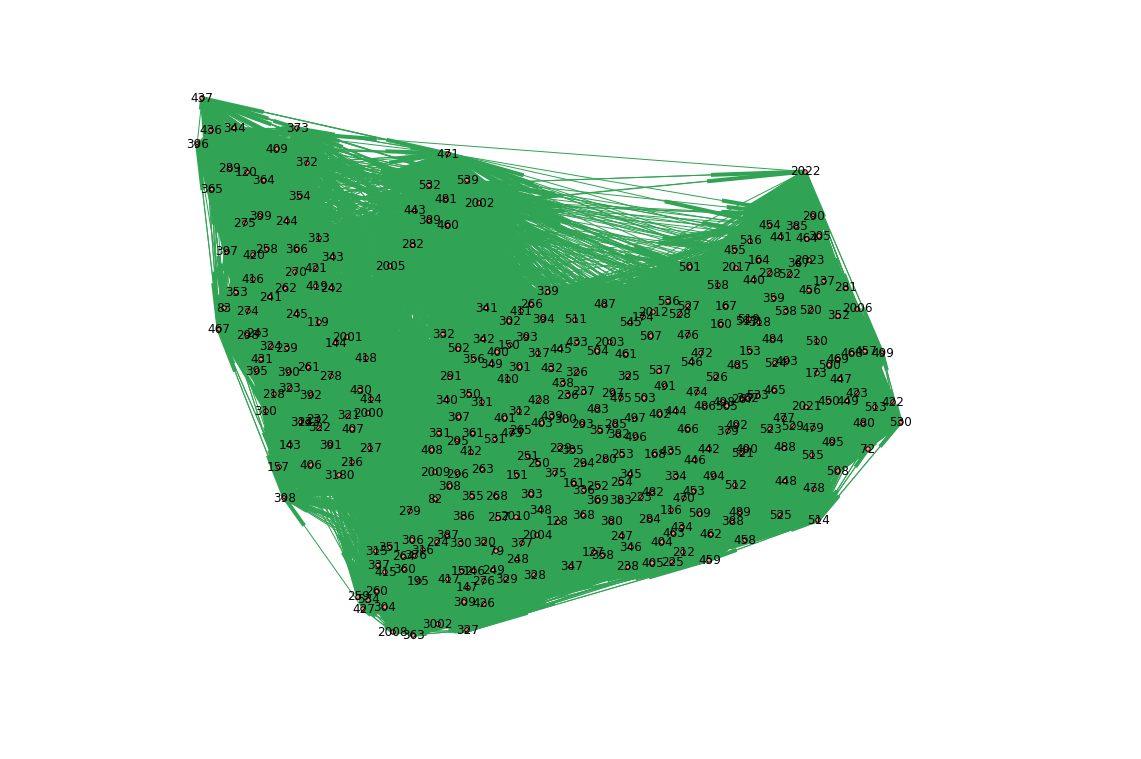

In [23]:
ax1 = plt.figure(figsize=(15,10))
np.random.seed(1335) 
nx.draw(G,pos,node_color='#fc9272',with_labels=True,node_size=20,width=1,edge_color='#31a354')